In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import glob
import statistics
import os

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data
# PD_Code/AirQualityData/PRSA_Data_Aotizhongxin_20130301-20170228.csv
path = os.getcwd()
# #csv_files = glob.glob(os.path.join(path, "*.csv")
# path='F:\AKU\AKU Updated Data\OneDrive_2022-09-23\Sample Data'
# csv_files = glob.glob(os.path.join(path,"*sample_data*.csv"))

filePath ='C:/Users/hzahid/Desktop/PRSA2017_Data_half'
allFiles = glob.glob(os.path.join(filePath,"*PRSA_Data*.csv"))
print(allFiles)
dataFrames = []
for i in allFiles:
    df = pd.read_csv(i, index_col=None, header=0)
    dataFrames.append(df)
data = pd.concat(dataFrames)
data

['C:/Users/hzahid/Desktop/PRSA2017_Data_half\\PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'C:/Users/hzahid/Desktop/PRSA2017_Data_half\\PRSA_Data_Changping_20130301-20170228.csv', 'C:/Users/hzahid/Desktop/PRSA2017_Data_half\\PRSA_Data_Dingling_20130301-20170228.csv']


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [3]:
# drop the row no column and rename the columns
data.drop(["No"], axis=1, inplace=True)
data.rename(columns = {'year': 'Year',
                       'month': 'Month',
                       'day': "Day",
                       'hour': 'Hour',
                       'pm2.5': 'PM2.5',
                       'DEWP': 'DewP',
                       'TEMP': 'Temp',
                       'PRES': 'Press',
                       'RAIN': 'Rain',
                       'wd': 'WinDir',
                       'WSPM': 'WinSpeed',
                       'station': 'Station'}, inplace = True)
data

,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [4]:
# check the null data
data.isnull().sum()

Year           0
Month          0
Day            0
Hour           0
PM2.5       2478
PM10        1956
SO2         2293
NO2         2924
CO          5309
O3          3537
Temp         126
Press        120
DewP         126
Rain         122
WinDir       361
WinSpeed     100
Station        0
dtype: int64

In [5]:
# fill the null values in numerical columns with average specific to certain column
# fill in the missing data in the columns according to the Month average.
unique_Month = pd.unique(data.Month)

# find PM2_5 averages in Month specific
# Equalize the average PM2.5 values to the missing values in PM2_5 specific to Month
temp_data = data.copy()  # set temp_data variable to avoid losing real data
columns = ["PM2.5", 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Press', 'DewP', 'Rain', 'WinSpeed'] # it can be add more column
for c in unique_Month:
    
    # create Month filter
    Month_filtre = temp_data.Month == c
    # filter data by Month
    fitered_data = temp_data[Month_filtre]
    
    # find average for PM2_5 in specific to Month
    for s in columns:
        mean = np.round(np.mean(fitered_data[s]), 2)
        if ~np.isnan(mean): # if there if average specific to Month
            fitered_data[s] = fitered_data[s].fillna(mean)
            print(f"Missing Value in {s} column fill with {mean} when Month:{c}")
        else: # find average for all data if no average in specific to Month
            all_data_mean = np.round(np.mean(data[s]),2)
            fitered_data[s] = fitered_data[s].fillna(all_data_mean)
            print(f"Missing Value in {s} column fill with {all_data_mean}")
    # Synchronize data filled with missing values in PM2.5 to data temporary            
    temp_data[Month_filtre] = fitered_data

# equate the deprecated temporary data to the real data variable
data = temp_data.copy()

Missing Value in PM2.5 column fill with 89.38 when Month:3
Missing Value in PM10 column fill with 133.26 when Month:3
Missing Value in SO2 column fill with 25.38 when Month:3
Missing Value in NO2 column fill with 51.04 when Month:3
Missing Value in CO column fill with 1207.97 when Month:3
Missing Value in O3 column fill with 55.19 when Month:3
Missing Value in Temp column fill with 8.4 when Month:3
Missing Value in Press column fill with 1012.2 when Month:3
Missing Value in DewP column fill with -8.53 when Month:3
Missing Value in Rain column fill with 0.01 when Month:3
Missing Value in WinSpeed column fill with 1.99 when Month:3
Missing Value in PM2.5 column fill with 70.1 when Month:4
Missing Value in PM10 column fill with 113.71 when Month:4
Missing Value in SO2 column fill with 12.5 when Month:4
Missing Value in NO2 column fill with 39.97 when Month:4
Missing Value in CO column fill with 750.95 when Month:4
Missing Value in O3 column fill with 74.37 when Month:4
Missing Value in Te

In [6]:
# fill the null values in categorical columns with mode specific to certain column

# fill in the missing data in the WinDir column with mode values according to the Station.
unique_Station = pd.unique(data.Station)

# find columns mode value in WinDir column according to Station column specific
# Equalize the mode values of columns to the missing values
temp_data = data.copy()  # set temp_data variable to avoid losing real data
columns = ["WinDir"] # it can be add more column
for c in unique_Station:
    
    # create Station filter
    Station_filtre = temp_data.Station == c
    
    # filter data by Station
    filtered_data = temp_data[Station_filtre]
    
    # find mode for WinDir specific to Station
    for column in columns:
        mode = statistics.mode(filtered_data[column])
        filtered_data[column] = filtered_data[column].fillna(mode)
        print(f"Missing Value in {column} column fill with {mode} when Station:{c}")

    # Synchronize data filled with missing values in WinDir to data temporary            
    temp_data[Station_filtre] = filtered_data

# equate the deprecated temporary data to the real data variable
data = temp_data.copy() 

Missing Value in WinDir column fill with NE when Station:Aotizhongxin
Missing Value in WinDir column fill with NNW when Station:Changping
Missing Value in WinDir column fill with NNW when Station:Dingling


In [7]:
# creating date field for further analysis by extracting day of the week, month etc.
data['Date']=pd.to_datetime(data[['Year', 'Month', 'Day']])
data.tail()

,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station,Date
35059,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,2017-02-28
35060,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,2017-02-28
35061,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,2017-02-28
35062,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,2017-02-28
35063,2017,2,28,23,13.0,16.0,4.0,9.0,500.0,74.0,7.0,1009.4,-12.2,0.0,N,1.9,Dingling,2017-02-28


In [8]:
from sklearn.preprocessing import LabelEncoder
# define a function for label encoding
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]): 
        print(f'{i}  ==>  {j}')
    return labelColumn



In [9]:
categorical_variables = ["WinDir", "Station"]
for i in categorical_variables:
    print(f"For {i} column ")
    data[f"{i}"] = labelEncoder(data[f"{i}"])
    print("**********************************")

For WinDir column 
Encoding Approach:
NNW  ==>  6
N  ==>  3
NW  ==>  7
NNE  ==>  5
ENE  ==>  1
E  ==>  0
NE  ==>  4
W  ==>  13
SSW  ==>  11
WSW  ==>  15
SE  ==>  9
WNW  ==>  14
SSE  ==>  10
ESE  ==>  2
S  ==>  8
SW  ==>  12
**********************************
For Station column 
Encoding Approach:
Aotizhongxin  ==>  0
Changping  ==>  1
Dingling  ==>  2
**********************************


In [10]:
data.head()

,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Press,DewP,Rain,WinDir,WinSpeed,Station,Date
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,6,4.4,0,2013-03-01
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,3,4.7,0,2013-03-01
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,6,5.6,0,2013-03-01
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,7,3.1,0,2013-03-01
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,3,2.0,0,2013-03-01


In [11]:
data.drop(["PM10", "Year", "Month", "Day", "Hour","Date"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105192 entries, 0 to 35063
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   PM2.5     105192 non-null  float64
 1   SO2       105192 non-null  float64
 2   NO2       105192 non-null  float64
 3   CO        105192 non-null  float64
 4   O3        105192 non-null  float64
 5   Temp      105192 non-null  float64
 6   Press     105192 non-null  float64
 7   DewP      105192 non-null  float64
 8   Rain      105192 non-null  float64
 9   WinDir    105192 non-null  int32  
 10  WinSpeed  105192 non-null  float64
 11  Station   105192 non-null  int32  
dtypes: float64(10), int32(2)
memory usage: 9.6 MB


In [12]:
print(data.head())
print(data.shape)

   PM2.5   SO2   NO2     CO    O3  Temp   Press  DewP  Rain  WinDir  WinSpeed  \
0    4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   0.0       6       4.4   
1    8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   0.0       3       4.7   
2    7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   0.0       6       5.6   
3    6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   0.0       7       3.1   
4    3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   0.0       3       2.0   

   Station  
0        0  
1        0  
2        0  
3        0  
4        0  
(105192, 12)


In [13]:
# create input and output
X = data.drop('PM2.5', axis = 1)
y = data['PM2.5']

In [14]:
# for train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=128)

# see train and test dataset shape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (84153, 11)
y_train: (84153,)
X_test: (21039, 11)
y_test: (21039,)


In [15]:


# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# make a function that include all regression models
def allRegressors(X_train, X_test, y_train, y_test):
    """
    This function use multiple machine learning regressors and show us the results of them 
    :param X_train: train input
    :param X_test: test input
    :param y_train: train output
    :param y_test: test output
    :return: Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) for each regressors and
    comparison plot for regressors according to RMSE and MAE
    """
    Regressors = [LinearRegression(), RandomForestRegressor(), GradientBoostingRegressor(), 
                   DecisionTreeRegressor()]
    mae_dict = {}
    mae_scores = []
    rmse_dict = {}
    rmse_scores = []
    r2_dict = {}
    r2_scores = []
    
    # function for mean absolute error
    def maeScore(regressor):
        """
        :param regressor: regressor model function
        :return: mean absolute error for regressor
        """
        
        clf = regressor.fit(X_train, y_train)
        pred = clf.predict(X_test)
        mae_score = mean_absolute_error(y_test, pred)
        return mae_score
    
    # function for root mean square error
    def rmseScore(regressor):
        """
        :param regressor: regressor model function
        :return: root mean score error for regressor
        """
        
        clf = regressor.fit(X_train, y_train)
        pred = clf.predict(X_test)
        rmse_score = np.sqrt(mean_squared_error(y_test, pred))
        return rmse_score
    
    def r2Score(regressor):
        """
        :param regressor: regressor model function
        :return: mean absolute error for regressor
        """
        
        clf = regressor.fit(X_train, y_train)
        pred = clf.predict(X_test)
        r2_Score = r2_score(y_test, pred)
        return r2_Score
    
    # mean absolute error, root mean square error for each regressors
    for regressor in Regressors:
        name = regressor.__class__.__name__
        mae_dict[name] = maeScore(regressor)
        mae_scores.append(maeScore(regressor))
        rmse_dict[name] = rmseScore(regressor)
        rmse_scores.append(rmseScore(regressor))
        r2_dict[name] = r2Score(regressor)
        r2_scores.append(r2Score(regressor))
        print("*************************************************************************")
        print(f"{name} Mean Absolute Error = {mae_dict[name]}")
        print(f"{name} Root Mean Square Error = {rmse_dict[name]}")
        print(f"{name} R2_Error = {r2_dict[name]}")
        
    #Plotting the performance of regressors
    def plotPerformance(scores_list, scores_dict, metric:str):
        """
        :param scores_list: list that include evaluation scores 
        :param scores_dict: dictionary that include regressors and evaluation scores
        :param metric: metric name y axis 
        :return: plot of performance comparison of regressors
        """
        
        N = len(Regressors)
        w = 0.5
        x = np.arange(N)
        plt.bar(x, scores_list, width = w, align = 'center', color="g")
        plt.xlabel("Regressors")
        plt.title("Performance Comparison of Regressors")
        plt.ylabel(f"{metric} Error")
        plt.xticks(x, scores_dict.keys(), rotation=90)
        plt.yticks(np.arange(0, np.max(scores_list), np.max(scores_list)/len(scores_list)))
        plt.show()
    
    # call the functions
    # plotPerformance(mae_scores, mae_dict, "Mean Absolute")
    # plotPerformance(rmse_scores, rmse_dict, "Root Mean Square")
    plotPerformance(r2_scores, r2_dict, "R2 error")

###### 

*************************************************************************
LinearRegression Mean Absolute Error = 27.953427723294883
LinearRegression Root Mean Square Error = 42.42734515737593
LinearRegression R2_Error = 0.6887594893124281
*************************************************************************
RandomForestRegressor Mean Absolute Error = 17.113939813815158
RandomForestRegressor Root Mean Square Error = 28.421179907517217
RandomForestRegressor R2_Error = 0.8603085635365724
*************************************************************************
GradientBoostingRegressor Mean Absolute Error = 23.180928642118833
GradientBoostingRegressor Root Mean Square Error = 37.33634758975588
GradientBoostingRegressor R2_Error = 0.759144749172022
*************************************************************************
DecisionTreeRegressor Mean Absolute Error = 22.969688673416037
DecisionTreeRegressor Root Mean Square Error = 40.972934307450224
DecisionTreeRegressor R2_Error = 0.712

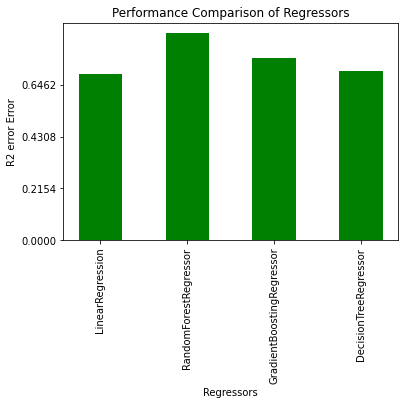

In [16]:
allRegressors(X_train, X_test, y_train, y_test)

In [22]:
x_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
x_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print(f"shape of X_train:", x_train_lstm.shape)
print(f"shape of X_test:", x_test_lstm.shape)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [ ]:
from tensorflow.keras import Model, Sequential, Input, backend
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

n_features = x_train_lstm.shape[2]
n_classes = 1
def regressorModel(n_features, n_classes):
    model = Sequential()
    model.add(Input(shape=(None, n_features)))
    model.add(LSTM(units=128))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    model.summary()
    return model

In [ ]:
# from keras.callbacks import EarlyStopping
callback = EarlyStopping(patience=20, mode='min', restore_best_weights=True)
#backend.clear_session()
model = regressorModel(n_features, n_classes)
history = model.fit(x_train_lstm, y_train,#validation_split=0.2 
                    validation_data=(x_test_lstm, y_test),epochs=100, batch_size=64, shuffle = False)

In [ ]:
train_mse = model.evaluate(x_train_lstm, y_train, verbose=0)
test_mse = model.evaluate(x_test_lstm, y_test, verbose=0)
print(f'Train loss: {train_mse [0]} / Train MSE: {train_mse [1]}')
print(f'Test loss: {test_mse [0]} / Test MSE: {test_mse [1]}')      

In [ ]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('MSE')
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
y_train_pred = model.predict(x_train_lstm)
print(y_train_pred)
y_test_pred = model.predict(x_test_lstm)
print(y_test_pred)
print(y_test_pred.shape)
# y_train_pred = np.argmax(y_train_pred_prob, axis=1)
# y_test_pred = np.argmax(y_test_pred_prob, axis=1)
# print(y_train_pred)
# print(y_test_pred)

In [ ]:
# Plot true future vs prediction
def plot_future(y_test_pred, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(y_test_pred)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label='True Future')     
    plt.plot(np.arange(range_future),np.array(y_test_pred),
            label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('Air-Quality (PM2.5)')


In [ ]:
plot_future(y_test_pred, y_test)

In [ ]:
# Define a function to calculate MAE and RMSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def evaluate_prediction(predictions, actual, model_name):
    # errors = predictions - actual
    # mse = np.square(errors).mean()
    # rmse = np.sqrt(mse)
    # mae = np.abs(errors).mean()
    mae = mean_absolute_error(actual,predictions)
    mse = mean_squared_error(actual,predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual,predictions)
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('R_2 Score: {:.4f}'.format(r2))
    print('')

evaluate_prediction(y_test_pred, y_test, 'LSTM')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 105192 samples in 0.799s...
[t-SNE] Computed neighbors for 105192 samples in 9.602s...
[t-SNE] Computed conditional probabilities for sample 1000 / 105192
[t-SNE] Computed conditional probabilities for sample 2000 / 105192
[t-SNE] Computed conditional probabilities for sample 3000 / 105192
[t-SNE] Computed conditional probabilities for sample 4000 / 105192
[t-SNE] Computed conditional probabilities for sample 5000 / 105192
[t-SNE] Computed conditional probabilities for sample 6000 / 105192
[t-SNE] Computed conditional probabilities for sample 7000 / 105192
[t-SNE] Computed conditional probabilities for sample 8000 / 105192
[t-SNE] Computed conditional probabilities for sample 9000 / 105192
[t-SNE] Computed conditional probabilities for sample 10000 / 105192
[t-SNE] Computed conditional probabilities for sample 11000 / 105192
[t-SNE] Computed conditional probabilities for sample 12000 / 105192
[t-SNE] Computed conditional probab

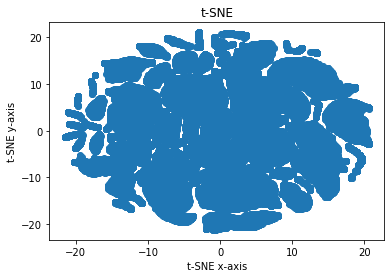

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne_generated = TSNE(n_components=2, verbose=1, perplexity=40,random_state=42, n_iter=500)

tsne_results_generated = tsne_generated.fit_transform(data)


plt.scatter(tsne_results_generated[:, 0], tsne_results_generated[:, 1])
plt.xlabel('t-SNE x-axis')
plt.ylabel('t-SNE y-axis')
plt.title('t-SNE')
plt.show()

In [ ]:
import numpy as np
from sklearn.neighbors import KernelDensity

# Create a sample dataframe
# data = pd.DataFrame({'Feature1': np.random.randn(1000),
#                      'Feature2': np.random.randn(1000)})

data=df_original




# Fit kernel density estimator
kde = KernelDensity(bandwidth=0.5)  # Set the bandwidth parameter
kde.fit(data)

# Generate points for density estimation
x = np.linspace(data.min(), data.max(), 1000)
# x = x.reshape(-1, 1)

# Calculate the density values for the points
density_values = np.exp(kde.score_samples(x))

# Plot the density estimate
plt.plot(x, density_values)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Density Estimation')
plt.show()